# Load Data

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes) 
X = student_performance.data.features
y = student_performance.data.targets

# metadata 
print(student_performance.metadata)

# variable information 
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [181]:
print(student_performance.data.keys())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [182]:
print(student_performance.data.original)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [183]:
df = student_performance.data.original
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [227]:
df.shape

(649, 33)

In [185]:
# path = "C:/Users/thuyt/OneDrive/Documents/UWS/Students Performance Prediction/student-mat.csv"
# 
# df = pd.read_csv(path, sep=';')
# print(df.shape)
# df

# Understanding

In [186]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [187]:
df.shape

(649, 33)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [189]:
df.select_dtypes(include='object').nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [190]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [191]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

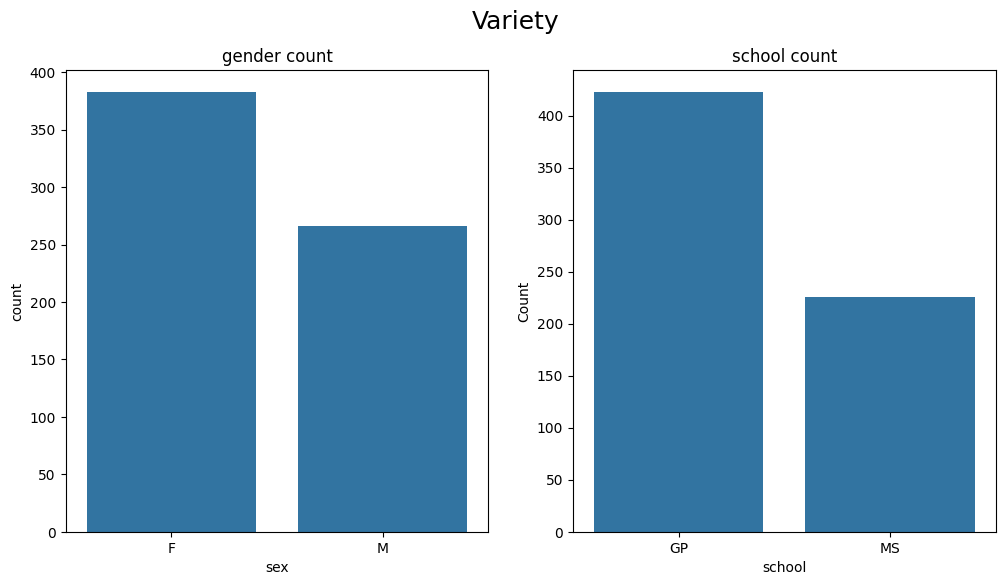

In [192]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x=df['sex'], ax=axs[0])
sns.countplot(x=df['school'], ax=axs[1])

plt.suptitle('Variety', fontsize =18)
axs[0].title.set_text('gender count')
axs[1].title.set_text('school count')

plt.ylabel('Count')

plt.show()

In [193]:
df[['sex', 'G1', 'G2', 'G3']].groupby(['sex']).agg(['min','median','max'])

G1             G2             G3           
    min median max min median max min median max
sex                                             
F     0   12.0  19   0   12.0  19   0   12.0  19
M     4   11.0  18   0   11.0  18   0   11.0  19

In [194]:
df[['school', 'G1', 'G2', 'G3']].groupby(['school']).agg(['min','median','max'])

G1             G2             G3           
       min median max min median max min median max
school                                             
GP       0   12.0  18   6   12.0  19   0   13.0  19
MS       4   10.0  19   0   10.0  18   0   11.0  19

In [195]:
df[['age', 'G1', 'G2', 'G3']].groupby(['age']).agg(['count','min','median','max', 'mean'])

G1                              G2                              G3      \
    count min median max       mean count min median max       mean count min   
age                                                                             
15    112   6   12.0  18  11.758929   112   7   12.0  17  11.830357   112   8   
16    177   5   12.0  17  11.723164   177   0   12.0  17  11.638418   177   0   
17    179   6   11.0  18  11.519553   179   0   12.0  19  11.849162   179   0   
18    140   0   11.0  19  11.200000   140   0   11.0  18  11.450000   140   0   
19     32   5    9.0  14   9.031250    32   0   10.0  13   9.312500    32   0   
20      6   8   10.5  14  10.333333     6   9   11.5  15  12.000000     6  10   
21      2   9    9.0   9   9.000000     2  10   11.0  12  11.000000     2  10   
22      1   7    7.0   7   7.000000     1   8    8.0   8   8.000000     1   5   

                           
    median max       mean  
age                        
15    12.0  18  12.107143  
16    12.0  18  11.994350  
17    12.0  19  12.268156  
18    12.0  19  11.771429  
19    10.0  14   9.531250  
20    11.0  15  12.000000  
21    11.0  12  11.000000  
22     5.0   5   5.000000

In [196]:
df[['school', 'sex', 'G1', 'G2', 'G3']].groupby(['school','sex']).agg(['min', 'mean','median','max'])

G1                        G2                        G3             \
           min       mean median max min       mean median max min       mean   
school sex                                                                      
GP     F     0  12.286920   12.0  18   7  12.502110   12.0  19   7  13.004219   
       M     7  11.602151   11.0  18   6  11.688172   11.0  18   0  12.032258   
MS     F     5  10.582192   10.0  19   0  10.719178   10.0  18   0  11.034247   
       M     4   9.787500   10.0  17   0  10.087500   10.0  18   0   9.950000   

                       
           median max  
school sex             
GP     F     13.0  19  
       M     12.0  18  
MS     F     11.0  18  
       M     10.0  19

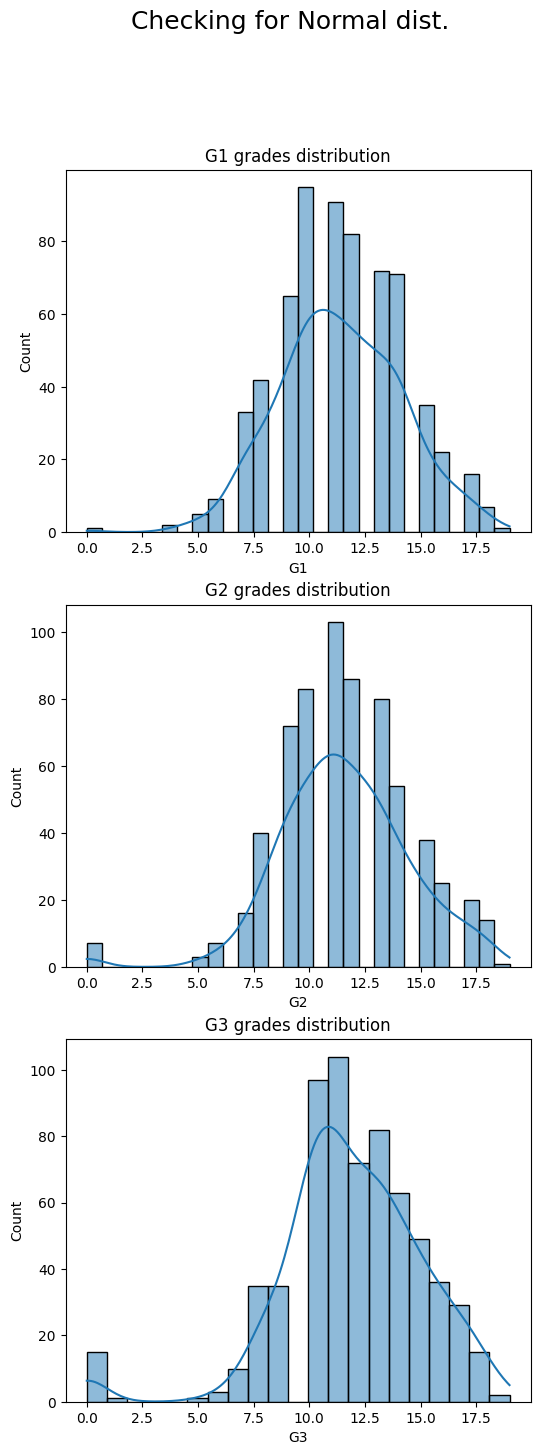

In [197]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,16))

for i in range(3):
    axs[i].title.set_text(f'G{i+1} grades distribution')
    sns.histplot(df[f'G{i+1}'], kde=True, ax=axs[i])
    
plt.suptitle('Checking for Normal dist.', fontsize = 18)
plt.show()
    

<Axes: xlabel='G3'>

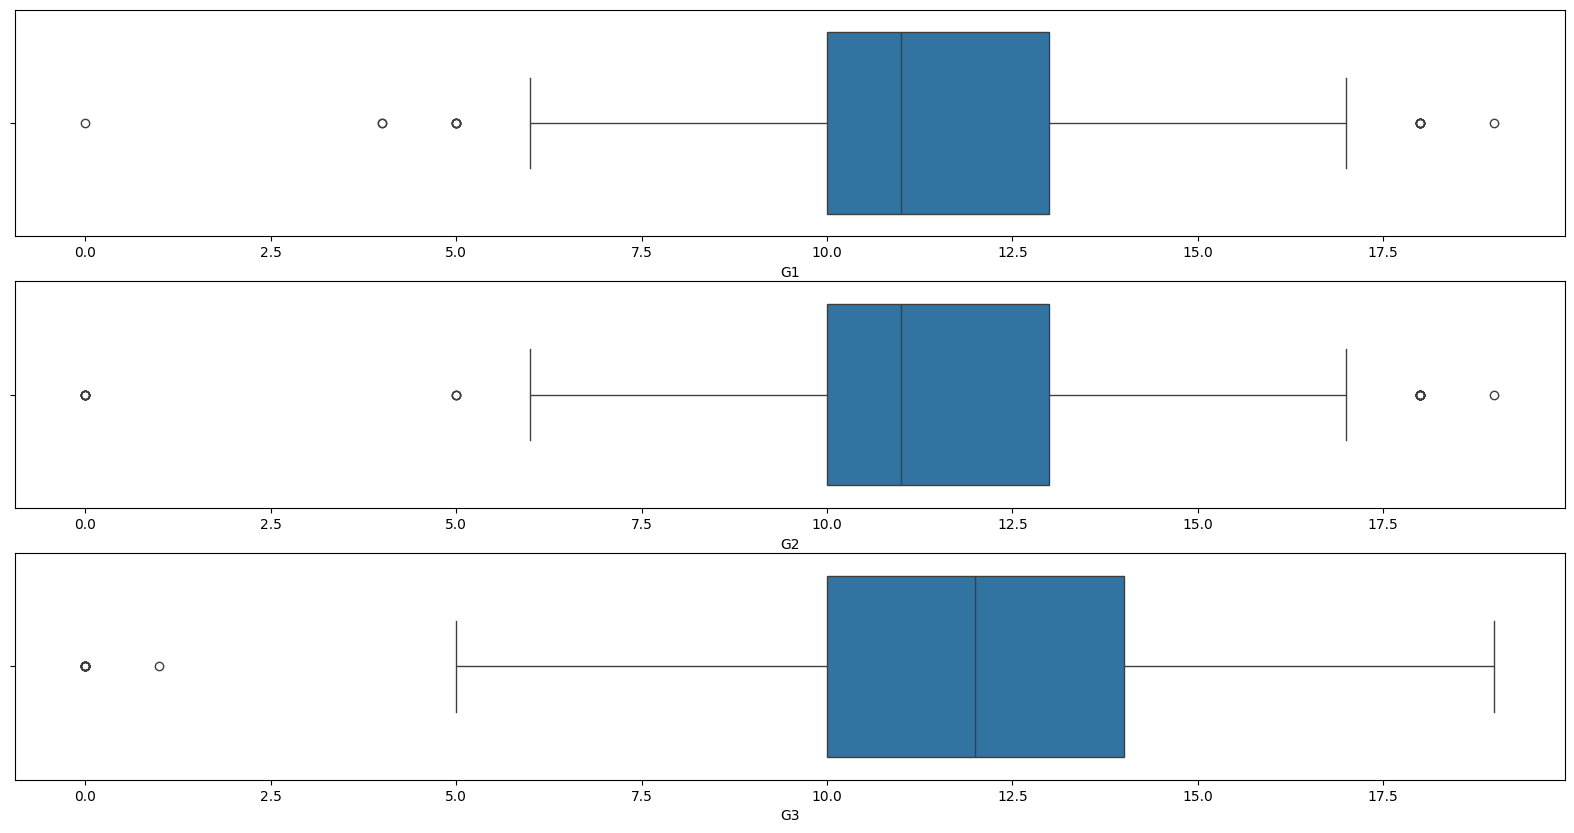

In [198]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20,10))
sns.boxplot(x='G1',data=df, ax=axs[0])
sns.boxplot(x='G2',data=df, ax=axs[1])
sns.boxplot(x='G3',data=df, ax=axs[2])

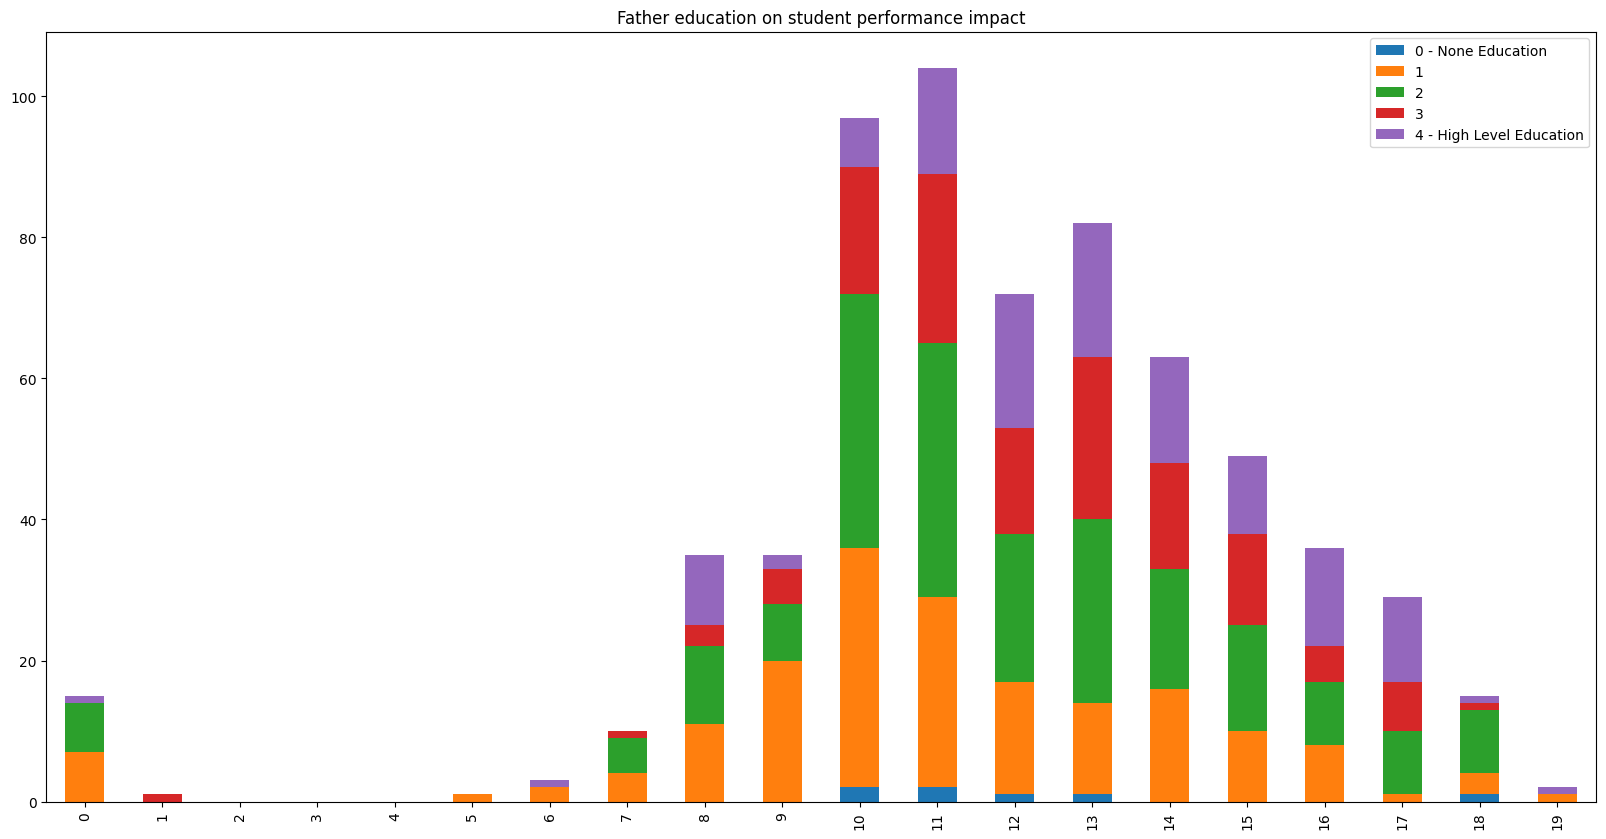

In [199]:
num_edu_levels = 5

X = list(range(df['G3'].min(), df['G3'].max() + 1))
num_unique_grades = len(X)
Y = np.zeros((num_unique_grades, num_edu_levels))

for grade in X:
    count = df[df['G3'] == grade]['Fedu'].value_counts()

    for i in count.keys():
        Y[grade][i] = count[i]

fedu_grade = pd.DataFrame(Y.tolist(), index=X)
fedu_grade.plot.bar(figsize=(20, 10), stacked=True)

plt.legend(labels=['0 - None Education', '1', '2', '3', '4 - High Level Education'])
plt.title('Father education on student performance impact')


plt.show()

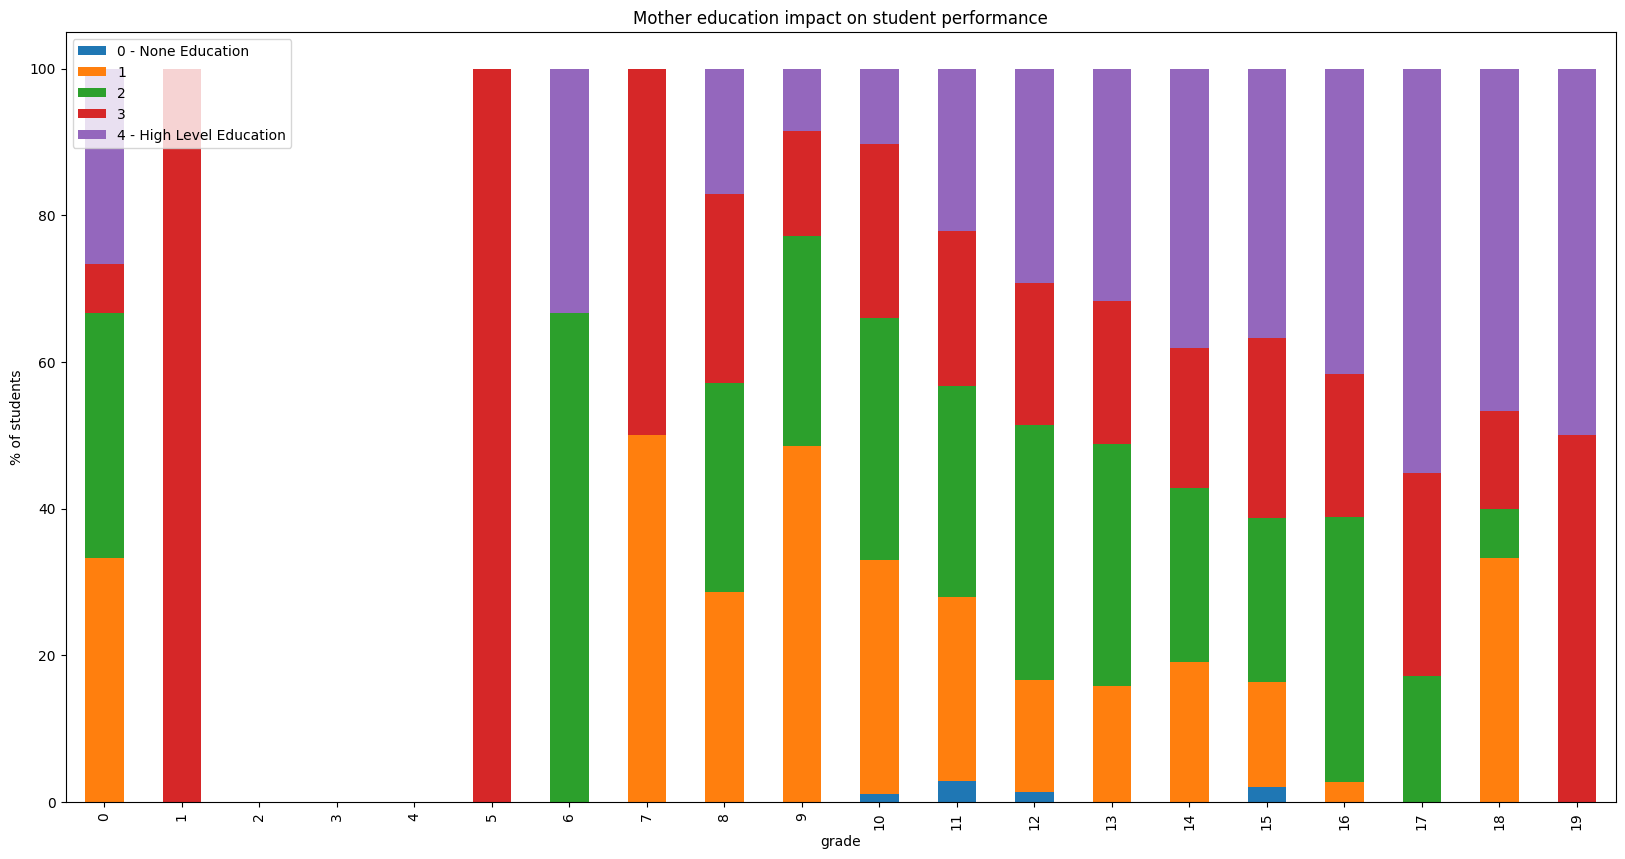

In [200]:
num_edu_levels = 5

X = list(range(df['G3'].min(), df['G3'].max() + 1))
num_unique_grades = len(X)
Y = np.zeros((num_unique_grades, num_edu_levels))

for grade in X:
    count = df[df['G3'] == grade]['Medu'].value_counts()

    for i in count.keys():
        Y[grade][i] = count[i]

fedu_grade = pd.DataFrame(Y.tolist(), index=X)
stacked_data = fedu_grade.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot.bar(figsize=(20, 10), stacked=True, xlabel='grade', ylabel='% of students')

plt.legend(labels=['0 - None Education', '1', '2', '3', '4 - High Level Education'])
plt.title('Mother education impact on student performance')

plt.show()

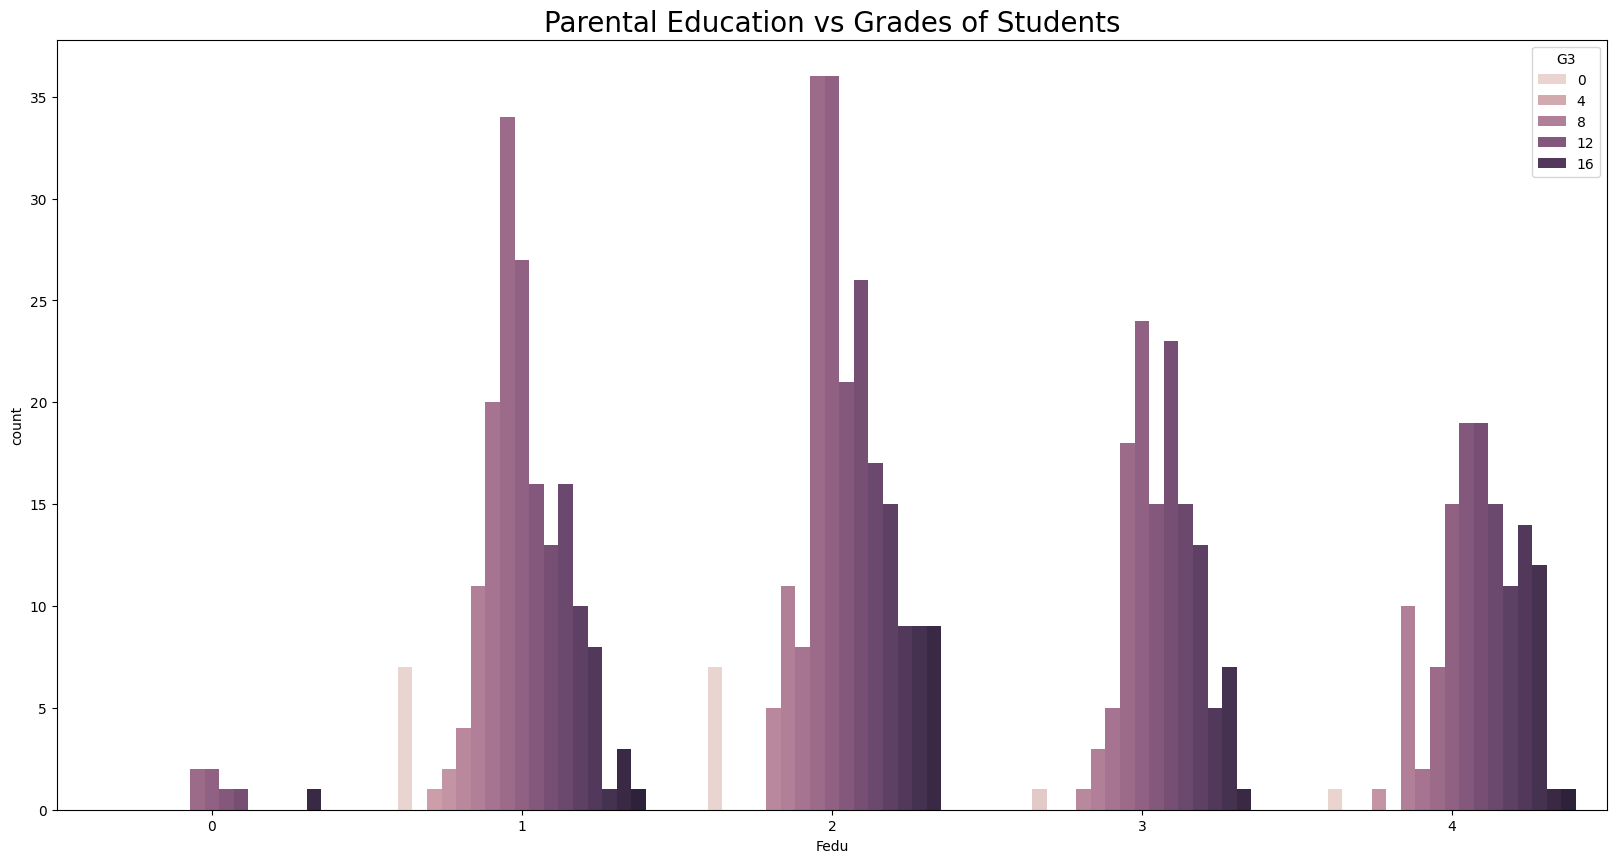

In [201]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = df['Fedu'], data = df, hue = df['G3'], ax=ax)
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

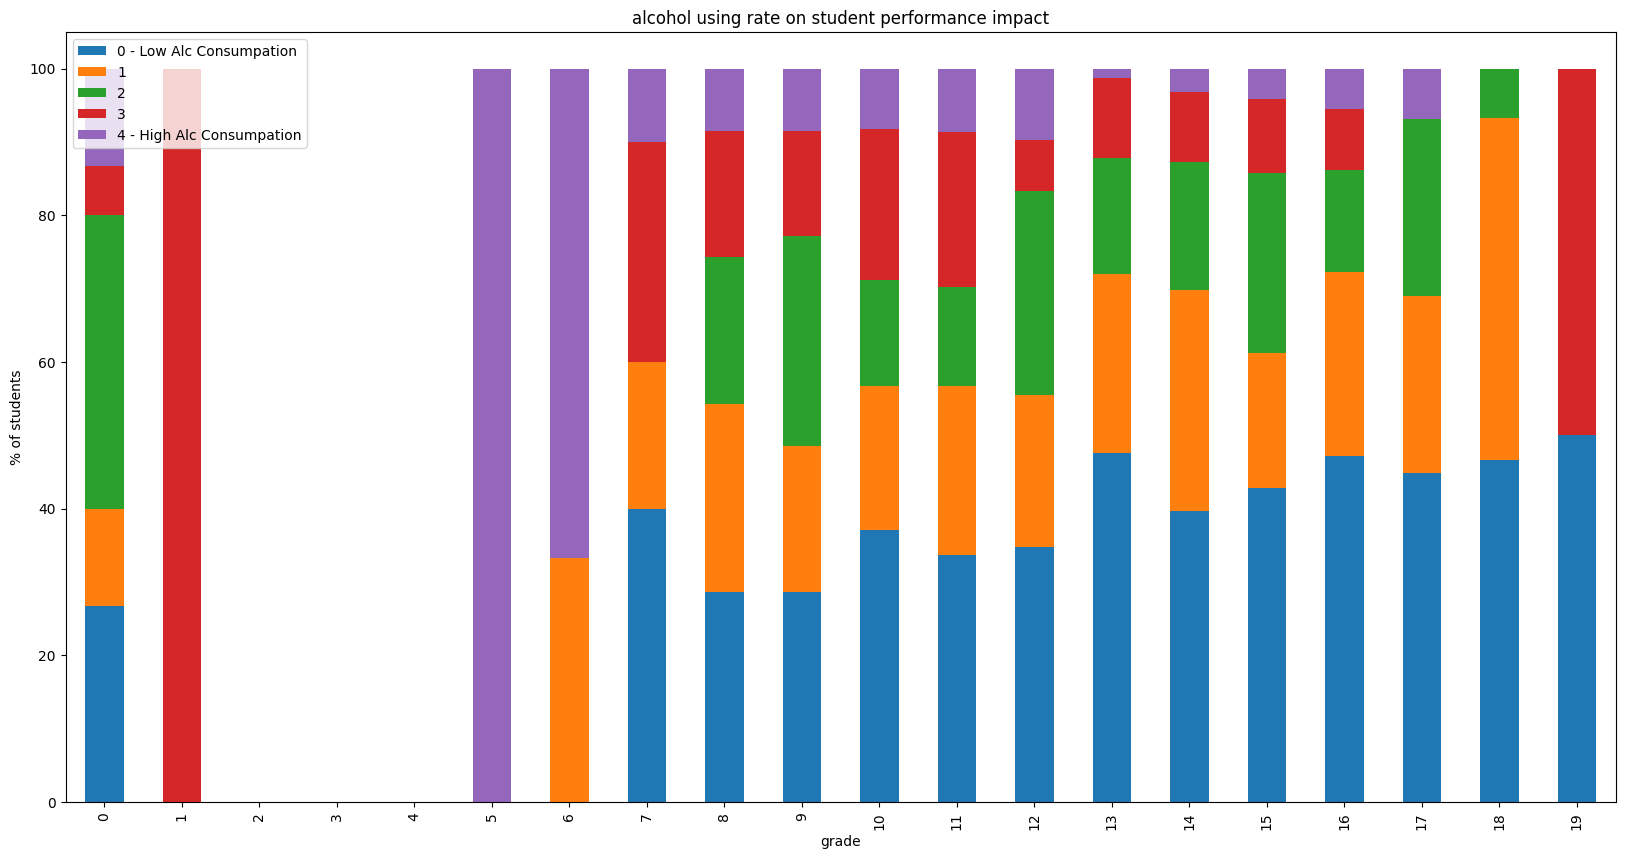

In [202]:
num_alc_levels = 5

X = list(range(df['G3'].min(), df['G3'].max() + 1))
num_unique_grades = len(X)
Y = np.zeros((num_unique_grades, num_alc_levels))

for grade in X:
    count = df[df['G3'] == grade]['Walc'].value_counts()

    for i in count.keys():
        Y[grade][i - 1] = count[i]


alc_grade = pd.DataFrame(Y.tolist(), index=X)
stacked_data = alc_grade.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot.bar(figsize=(20, 10), stacked=True, xlabel='grade', ylabel='% of students')

plt.legend(labels=['0 - Low Alc Consumpation', '1', '2', '3', '4 - High Alc Consumpation'])
plt.title('alcohol using rate on student performance impact')

plt.show()

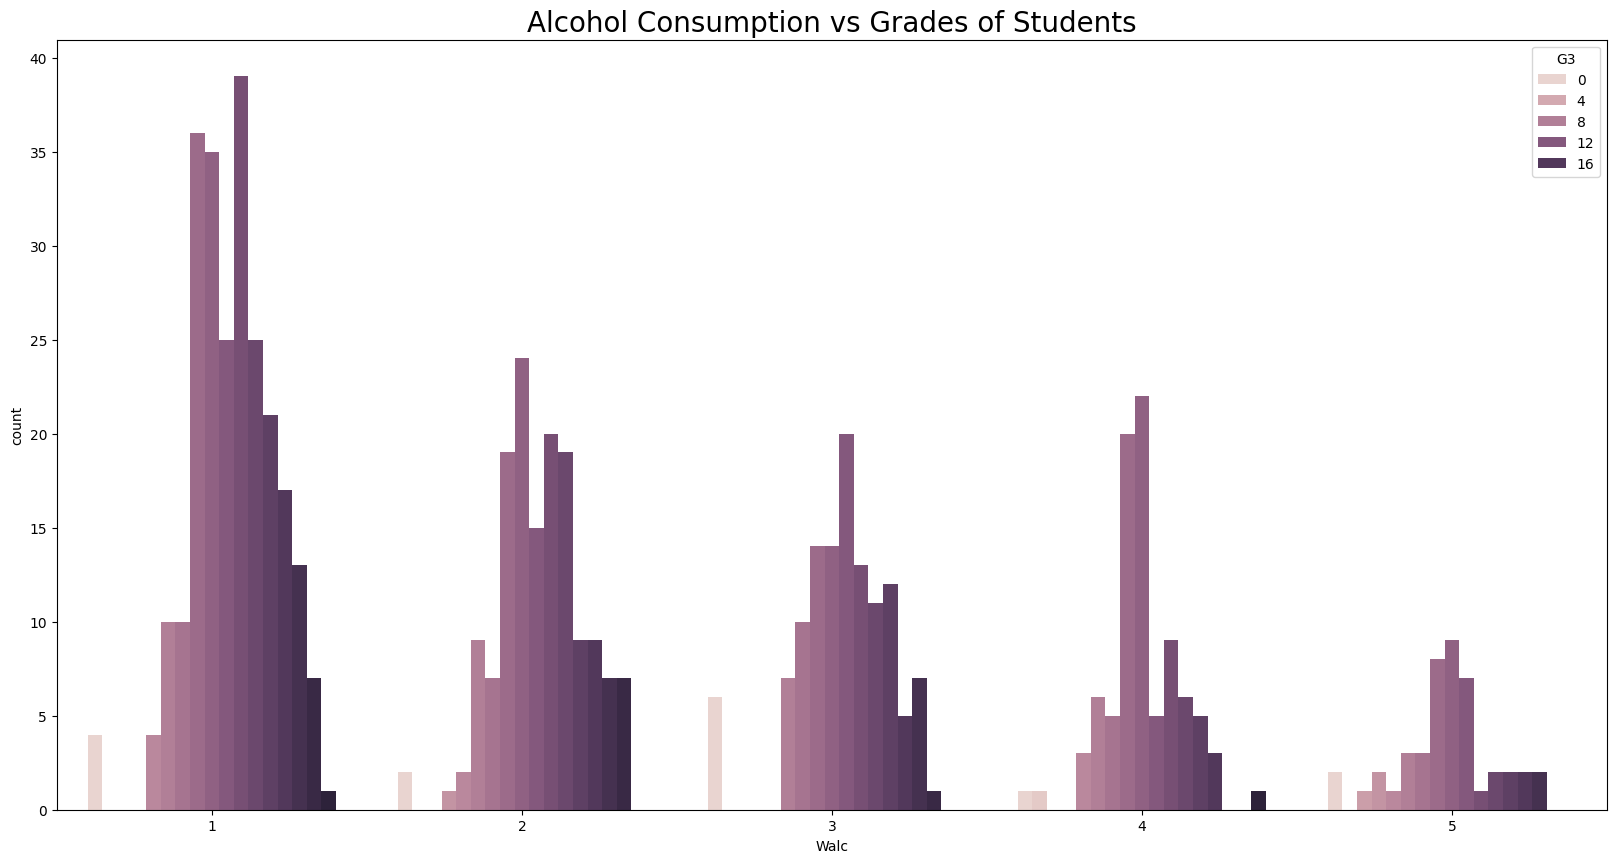

In [203]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = df['Walc'], data = df, hue = df['G3'], ax=ax)
plt.title('Alcohol Consumption vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

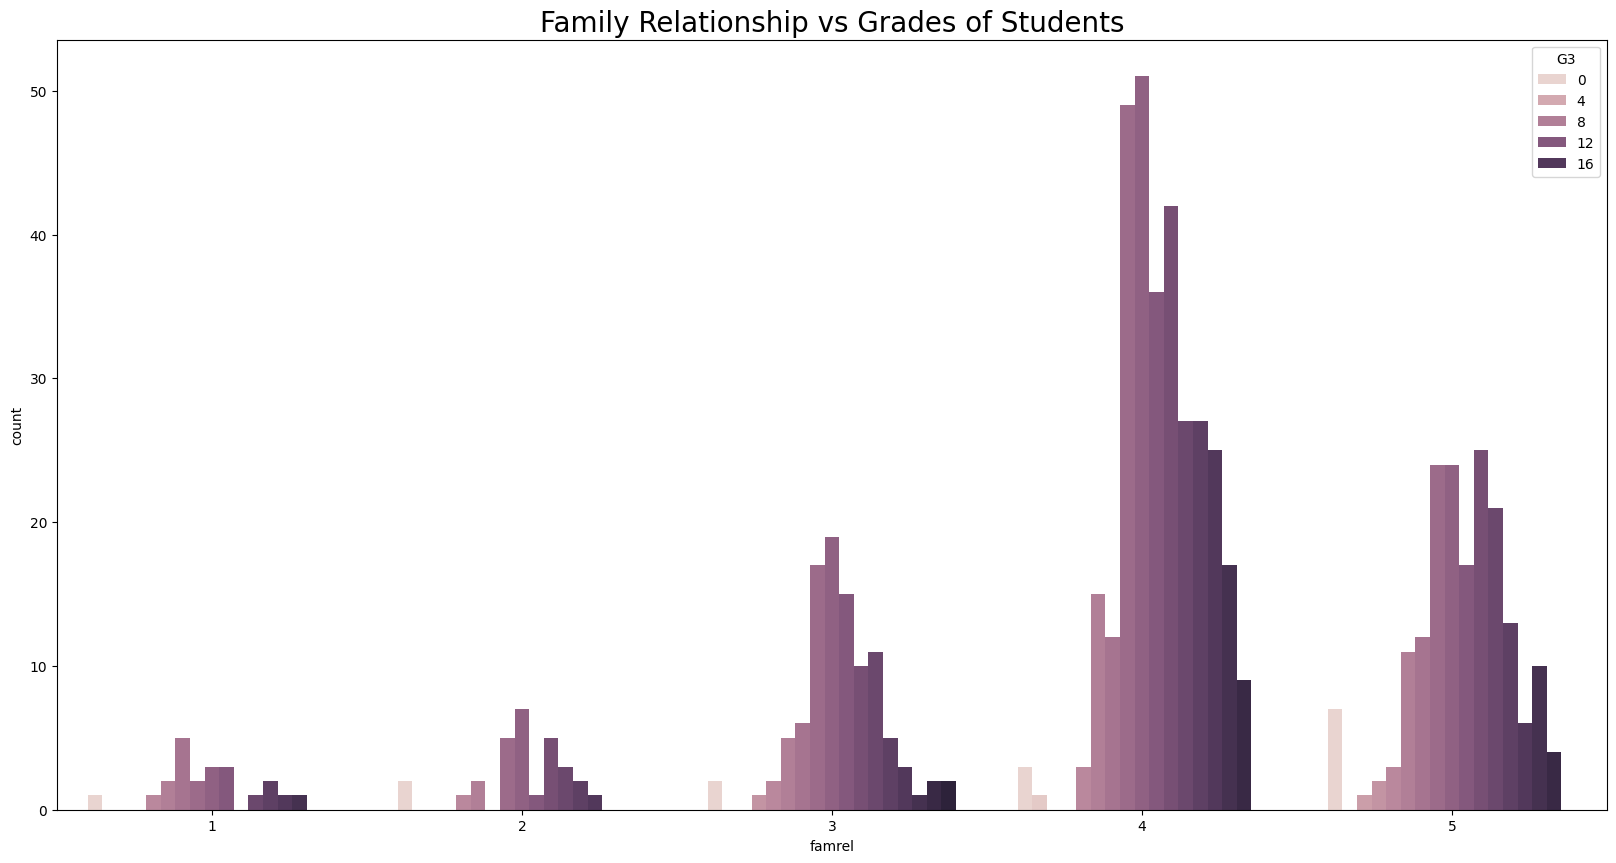

In [204]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = df['famrel'], data = df, hue = df['G3'], ax=ax)
plt.title('Family Relationship vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

<Axes: ylabel='count'>

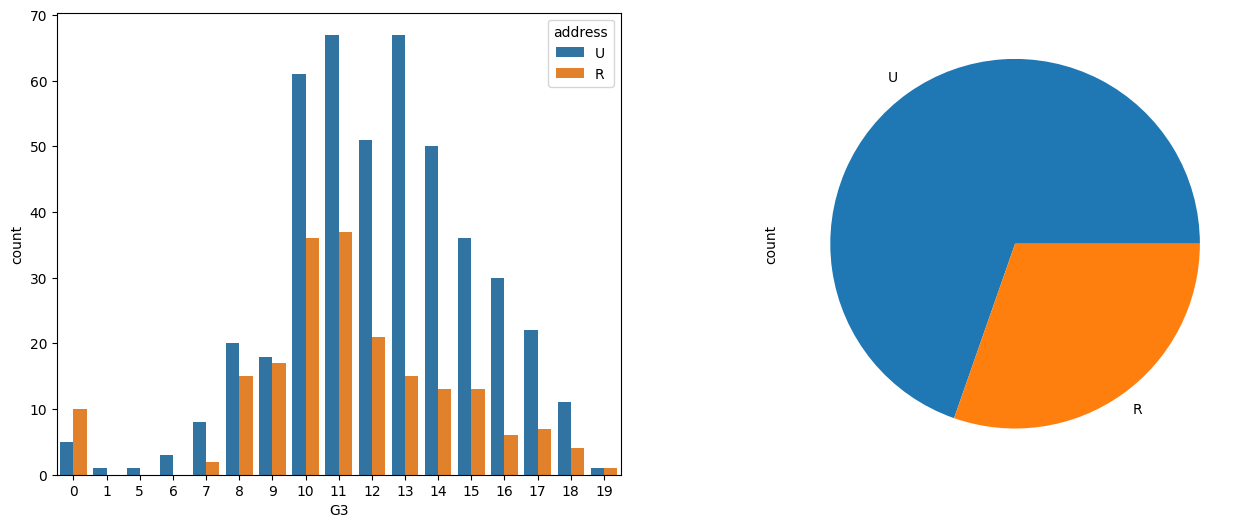

In [205]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6))

sns.countplot(x="G3", hue="address", data=df, ax=axs[0])
df['address'].value_counts().plot.pie(ax=axs[1])

<Axes: ylabel='count'>

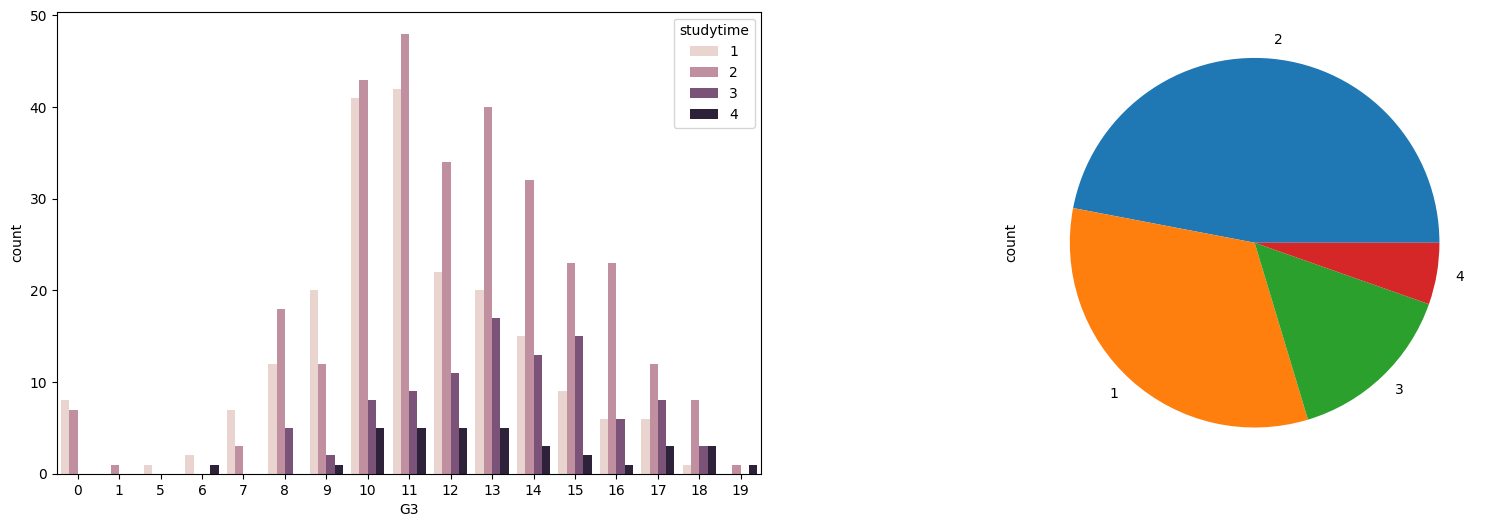

In [206]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))

sns.countplot(x="G3", hue="studytime", data=df, ax=axs[0])
df['studytime'].value_counts().plot.pie(ax=axs[1])

# Data Cleaning

In [207]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [208]:
#check missing values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [210]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [211]:
object_cols = df.select_dtypes('object')
object_cols

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


# Feature engineering

In [213]:
from sklearn.preprocessing import LabelEncoder


# df = pd.get_dummies(df, columns=non_binary_cols)

le = LabelEncoder()
for col in object_cols.keys():
    df[col] = le.fit_transform(df[col])

In [214]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,6,12,12,13
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,13,12,13
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,2,10,13,13
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,15,16,17
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,12,12,13


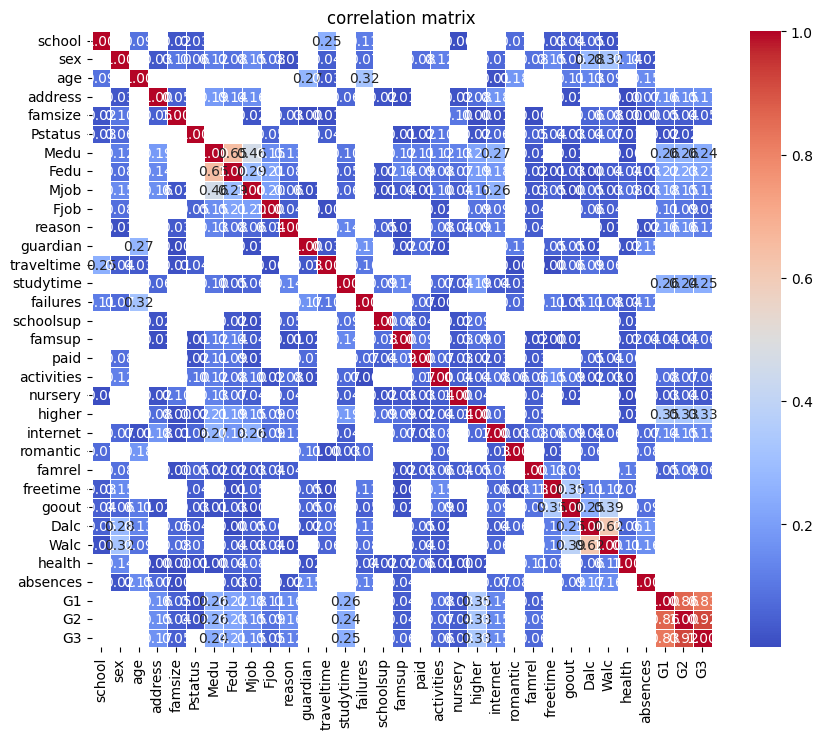

In [274]:
correlation_matrix = df.corr(method='pearson')
positive_correlation = correlation_matrix[correlation_matrix > 0]
plt.figure(figsize=(10, 8))
sns.heatmap(positive_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [216]:
g_correlation = positive_correlation.loc[['G1', 'G2', 'G3'], :]
g_correlation

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
G1,NaN,NaN,NaN,0.157127,0.047230,0.015251,0.260472,0.217501,0.181551,0.109847,...,0.048795,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.864982,0.826387
G2,NaN,NaN,NaN,0.154600,0.038891,0.018689,0.264035,0.225139,0.153875,0.086343,...,0.089588,NaN,NaN,NaN,NaN,NaN,NaN,0.864982,1.000000,0.918548
G3,NaN,NaN,NaN,0.167637,0.045016,NaN,0.240151,0.211800,0.148252,0.052953,...,0.063361,NaN,NaN,NaN,NaN,NaN,NaN,0.826387,0.918548,1.000000


# Modelling

In [267]:
'''
FEATURE SELECTION
Drop all features with negative correlation value
'''
features = df.drop(['school','sex', 'age', 'Pstatus', 'guardian', 'traveltime', 'failures', 'schoolsup', 'paid', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G3'], axis =1)
# features = df.filter(['Medu', 'Fedu', 'studytime', 'higher', 'G1', 'G2'])
target = df['G3']

In [268]:
features.head(10)

,Medu,Fedu,studytime,higher,G1,G2
0,4,4,2,1,0,11
1,1,1,2,1,9,11
2,1,1,2,1,12,13
3,4,2,3,1,14,14
4,3,3,2,1,11,13
5,4,3,2,1,12,12
6,2,2,2,1,13,12
7,4,4,2,1,10,13
8,3,2,2,1,15,16
9,3,4,2,1,12,12


In [269]:
'''
FEATURE NORMALIZATION
Scale data using StandardScaler
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_features = scaler.fit_transform(features)

In [275]:
'''
TRAIN TEST SPLITTING
Split data into two sets with ratio 0.8 / 0.2
'''
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scaler_features, target, test_size=0.2, random_state=42)

In [271]:
'''
TRAIN AND EVALUATE MODEL
Model: LinearRegression
Metrics: Accuracy, R2 score
Loss function: MSE
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
# calculating the regression accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_val, y_val))

# explain the score
print(f'r_2 score {r2_score(y_val, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_val, y_pred)}')


Training Accuracy : 0.8445066467170061
Testing Accuracy : 0.8580656685838053
r_2 score 0.8580656685838053
Mean squared error: 1.3841032872612158


In [272]:
'''
Model: GradientBoostingRegressor
'''
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_val)
# calculating the regression accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_val, y_val))

# explain the score
print(f'r_2 score {r2_score(y_val, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_val, y_pred)}')


Training Accuracy : 0.9052650861161299
Testing Accuracy : 0.8162761608347383
r_2 score 0.8162761608347383
Mean squared error: 1.791622697620816


In [273]:
'''
Model: SGDRegressor
'''
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_val)
# calculating the regression accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_val, y_val))

# explain the score
print(f'r_2 score {r2_score(y_val, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_val, y_pred)}')


Training Accuracy : 0.843992362414282
Testing Accuracy : 0.8556087050555612
r_2 score 0.8556087050555612
Mean squared error: 1.4080628977528569
